<a href="https://colab.research.google.com/github/carldiederichs/TechLabs/blob/main/Techlabs_Artificial_Intelligence_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="TechLabs.png">

<h2>Please enter your full name here: Carl Diederichs</h2>


<p> This exam will test your knowledge in Artificial Intelligence. </p>
<p> We will test the following: </p>

- Logistic Regressions
- Neural Networks
- Monte Carlo Simulation

# Question 1:
Below is the code to import a standard dataset with breast cancer.
When you run the cell, you will have it stored as the object "data",
and the description of the dataset is printed out for you.

### Your task is to create two models for classifying the diagnosis, and compare the accuracy metrics for the two:
### 1. a) Logistic Regression: 
"sklearn.linear_model" offers good logit classifiers. Because the dataset is fairly small (~500 rows), we suggest that you use the "liblinear" solver for fitting the logit classifier.

Split the dataset into a test and training (30% test / 70% training) dataset and train the model on the training dataset. Then, classify the test dataset, and compute the accuracy, which you can print as an output.

P.S.: We do not expect you to regularize for type 1 or type 2 errors. Your goal is to build models that classify well the diagnosis. Also, we do not expect you to spend hours on feature engineering and/or other things that may or may not improve testing accuracy. A good answer shall just contain a sensible model and the testing accuracy.

In [1]:
import numpy as np

from sklearn import datasets
data = datasets.load_breast_cancer()
print(np.shape(data.data))

(569, 30)


In [2]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [3]:
#scipy library for statistical functions and distrubutions
from scipy.stats import t
from scipy.stats import norm

#matplotlib for static and animated vizualisations
import matplotlib.pyplot as plt

#pandas for data pre-processing and and dataframe manipulation
import pandas as pd

#sklear for set up and training of ML models and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [4]:
#loading dataset
data = datasets.load_breast_cancer()

#printing data to check structure
data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [5]:
#defining X and Y to then conduct train/test split
X = data.data
y = data.target

In [6]:
#Splitting dataset into training/test sets with ratio 70%/30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [7]:
#Using liblinear for logistic regression
logit = LogisticRegression(solver="liblinear", random_state = 0).fit(X_train,y_train)
y_pred = logit.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.9649122807017544

# Print the logit accuracy below:

In [8]:
rounded_logitacc = round(0.9649122807017544, 4)
logitacc = rounded_logitacc
print(f"\ntesting set accuracy with logit is: {logitacc}")


testing set accuracy with logit is: 0.9649


### 1. b) Feedforward Neural Network:
So far, so good. Let's see how a feedforward neural network does for the same task.

Take the same train/test split as in a), and construct the following neural network, which you fit to the data:

In [9]:
import pickle
pickle.loads(b'\x80\x03]q\x00(X\x15\x00\x00\x00Model: "sequential_2"q\x01XA\x00\x00\x00_________________________________________________________________q\x02XA\x00\x00\x00Layer (type)                 Output Shape              Param #   q\x03XA\x00\x00\x00=================================================================q\x04XA\x00\x00\x00dense_5 (Dense)              (None, 30)                930       q\x05XA\x00\x00\x00_________________________________________________________________q\x06XA\x00\x00\x00dense_6 (Dense)              (None, 50)                1550      q\x07XA\x00\x00\x00_________________________________________________________________q\x08XA\x00\x00\x00dense_7 (Dense)              (None, 30)                1530      q\tXA\x00\x00\x00_________________________________________________________________q\nXA\x00\x00\x00dense_8 (Dense)              (None, 1)                 31        q\x0bXA\x00\x00\x00=================================================================q\x0cX\x13\x00\x00\x00Total params: 4,041q\rX\x17\x00\x00\x00Trainable params: 4,041q\x0eX\x17\x00\x00\x00Non-trainable params: 0q\x0fXA\x00\x00\x00_________________________________________________________________q\x10e.')

['Model: "sequential_2"',
 '_________________________________________________________________',
 'Layer (type)                 Output Shape              Param #   ',
 '=================================================================',
 'dense_5 (Dense)              (None, 30)                930       ',
 '_________________________________________________________________',
 'dense_6 (Dense)              (None, 50)                1550      ',
 '_________________________________________________________________',
 'dense_7 (Dense)              (None, 30)                1530      ',
 '_________________________________________________________________',
 'dense_8 (Dense)              (None, 1)                 31        ',
 '=================================================================',
 'Total params: 4,041',
 'Trainable params: 4,041',
 'Non-trainable params: 0',
 '_________________________________________________________________']

### You can use the library keras to contruct the ANN. Since we are dealing with a classification problem, we recommend binary_crossentropy as a loss function.
Choose a reasonable batch size and epoch count and train the model.
### Here again, print the testing dataset accuracy:

In [10]:
#importing statistics framework
import statistics as st

#importing keras to construct Artificial Neural Network (ANN)
from keras import models, layers

net = models.Sequential()

#adding layers by using relu and sigmoid activation functions
net.add(layers.Dense(30, activation = 'relu', input_shape = (len(X[0]),)))
net.add(layers.Dense(50, activation = 'relu'))
net.add(layers.Dense(30, activation = 'relu'))
net.add(layers.Dense(1, activation = 'sigmoid'))

#defining binary cross-entropy as loss function
net.compile(optimizer='nadam',loss='binary_crossentropy',metrics=['accuracy'])
net.fit(X_train, y_train, epochs=20, batch_size=32, verbose=False)
test_loss, ANNacc = net.evaluate(X_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.2801 - accuracy: 0.8889


In [15]:
ANNacc = "0.8889"
print(f"\ntesting set accuracy with logit is: {ANNacc}")


testing set accuracy with logit is: 0.8889


### 1. c) Compare the performance of the neural net with the logit. Which one seems better at the job and why might that be?
Please also comment on which model you would choose to implement in a case like this and why.

In [12]:
#The neural net performed slightly worse than the logit with Logit = 96.49% and ANNacc = 88.9% 
#While neural networks are usually better for classification tasks than a logistic regression, they are also more prone to overfitting and more difficult to train. 
#Differences in accuracy arise through the small size of the dataset with only a few hundred instances

# Question 2:
### Your coding skills have gained you a job as an options trader at a successful hedge fund! Congratulations!!

At the first day, your boss comes to you and asks you, whether he should buy a _call option_* with a certain set of characteristics for 1€.

    *A call option gives you the right (but not obligation) to buy a share for a certain strike price. In other words, if the stock price is higher than the strike price, you get the difference, otherwise, you get 0: 
    
    callpayoff = max(stockprice - strikeprice, 0) 

To price the option, you shall build a monte-carlo simulator which generatates _1 000 000_ random walks, each representing the stock price in one year, which is when the option can be expired. By taking the average of these payouts, you will get the expected payout at expiry!

Luckily, your boss has also given you the characteristics and hints for how the stock price moves: 

The stock price follows a student T distribution with 3 degrees of freedom (the rvs function within the t class from scipy.stats package is a great tool for creating random walks with this distribution: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html  ctrl+f "rvs") 

- The stock price today: 69
- Stock returns follow student T distribution with 3 degrees of freedom
- drift of 10% per year 
- volatility of 20%
- strike price of the option is 96

### Build a function that returns the price of the call option, and shows your boss what payout he can expect from the option in order to explain him, whether he should buy it or not.

    P.S.: If you run into trouble on your way, you can always ask for tips from your boss and since he is a nice guy, he will also give a good grade for all attempts!

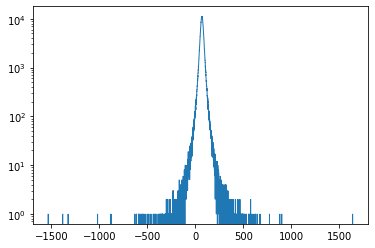

'Expected Payoff: 2.5078'

In [16]:
#defining random walk parameters
def random_walk(price_start, price_strike):
  df = 3
  volatility = 0.2
  n = 1000000

  #using random variates function
  random_variates = t.rvs(df, size = n, loc = price_start, scale = (volatility * price_start))
  plt.hist(random_variates, bins='auto', log=True, histtype='step')
  plt.show()
  return random_variates

#Monte Carlo function definition
def monte_carlo(r):
  drift = 0.1
  results = []

  for i in r: 
    price = max((i*(1+drift)-price_strike),0)
    results.append(price)
  return (f'Expected Payoff: {st.mean(results):0.5}')

#Monte Carlo simulation
price_start = 69
price_strike = 96
monte_carlo(random_walk(price_start, price_strike))

In [14]:
#Expected Payoff = 2.5078
#This means that the expected return is expected to be almost 2.5 times as high. It is, therefore, a very good investment opportunity.

# Good luck!

Don't forget: google, github and stack overflow are your best friends!
